# **Image Classification Tourist Attraction**

# **Load Data**

### Sumber data : Google Search dan Bing Search

In [ ]:
#Mount google drive untuk akses dataset kita

from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
gdrive	sample_data


In [ ]:
%cd gdrive/My\ Drive/BANGKIT CAPSTONE/ASET WISATA DIENG/
!ls

/content/gdrive/.shortcut-targets-by-id/1d_TNzxbDIaUe1hMw8bodtnE5b1aIm8t5/ASET WISATA DIENG
 CANDI	'KAWAH SIKIDANG'  'TELAGA WARNA'   TRAINING   VALIDATION


In [ ]:
#Lihat sekilas dataset nya!

import os

dir_candi = os.path.join('TRAINING/CANDI')
dir_kawah = os.path.join('TRAINING/KAWAH')
dir_telaga = os.path.join('TRAINING/TELAGA')

print('total gambar candi pada data training:', len(os.listdir(dir_candi)))
print('total gambar kawah sikidang pada data training:', len(os.listdir(dir_kawah)))
print('total gambar telaga warna pada data training:', len(os.listdir(dir_telaga)))

dir_candi_validation = os.path.join('VALIDATION/CANDI')
dir_kawah_validation = os.path.join('VALIDATION/KAWAH')
dir_telaga_validation = os.path.join('VALIDATION/TELAGA')

print('total gambar candi pada data validation:', len(os.listdir(dir_candi_validation)))
print('total gambar kawah sikidang pada data validation:', len(os.listdir(dir_kawah_validation)))
print('total gambar telaga warna pada data validation:', len(os.listdir(dir_telaga_validation)))

file2_candi = os.listdir(dir_candi)
print(file2_candi[:10])
file2_kawah = os.listdir(dir_kawah)
print(file2_kawah[:10])
file2_telaga = os.listdir(dir_telaga)
print(file2_telaga[:10])

total gambar candi pada data training: 62
total gambar kawah sikidang pada data training: 58
total gambar telaga warna pada data training: 30
total gambar candi pada data validation: 20
total gambar kawah sikidang pada data validation: 20
total gambar telaga warna pada data validation: 11
['IMG_20220518_090121.jpg', 'IMG_20220518_090250.jpg', 'IMG_20220518_090316.jpg', 'IMG_20220518_090319.jpg', 'IMG_20220518_090349.jpg', 'IMG_20220518_090426.jpg', 'IMG_20220518_090506.jpg', 'IMG_20220518_090516.jpg', 'IMG_20220518_090718.jpg', 'IMG_20220518_090750.jpg']
['IMG_20220518_112850.jpg', 'IMG_20220518_112910.jpg', 'IMG_20220518_112926.jpg', 'IMG_20220518_112932.jpg', 'IMG_20220518_112950.jpg', 'IMG_20220518_113000.jpg', 'IMG_20220518_113029.jpg', 'IMG_20220518_113048.jpg', 'IMG_20220518_113120.jpg', 'IMG_20220518_113123.jpg']
['IMG_20220518_094624.jpg', 'IMG_20220518_094650.jpg', 'IMG_20220518_094718.jpg', 'IMG_20220518_094820.jpg', 'IMG_20220518_094828.jpg', 'IMG_20220518_094859.jpg', 'IMG_

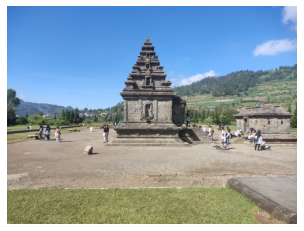

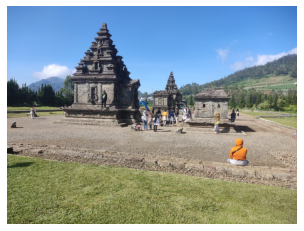

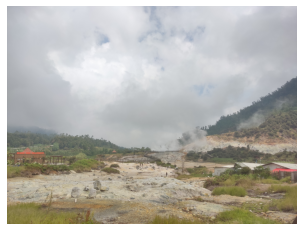

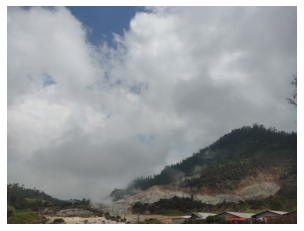

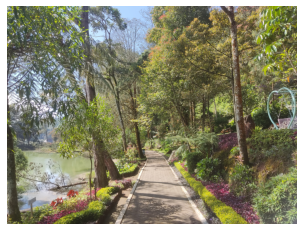

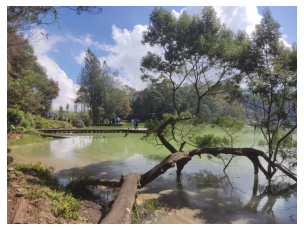

In [ ]:
#Lihat gambar-gambarnya sekilas!

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

indeks = 3

i_candi = [os.path.join(dir_candi, fname) 
                for fname in file2_candi[indeks-2:indeks]]
i_kawah = [os.path.join(dir_kawah, fname) 
                for fname in file2_kawah[indeks-2:indeks]]
i_telaga = [os.path.join(dir_telaga, fname) 
                for fname in file2_telaga[indeks-2:indeks]]


for i, j in enumerate(i_candi+i_kawah+i_telaga):
  gambar = mpimg.imread(j)
  plt.imshow(gambar)
  plt.axis('Off')
  plt.show()

# **Model CNN Biasa u/ Image Classification**

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
#Mulai buat model nya!

dir_training = "TRAINING/"

training_datagen = ImageDataGenerator(
      rescale = 1.0/255.,
	    rotation_range=30,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

dir_validation = "VALIDATION/"

validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = training_datagen.flow_from_directory(
	dir_training,
	target_size=(224,224),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	dir_validation,
	target_size=(224,224),
	class_mode='categorical'
)

model_ini = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model_ini.summary()

Found 149 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        73792     
                                         

In [ ]:
labels = train_generator.class_indices.keys()

In [ ]:
#Latih model tersebut dan ukur seberapa baik modelnya!

model_ini.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

performa = model_ini.fit(train_generator, epochs=6, steps_per_epoch=5, validation_data = validation_generator, verbose = 1)

Epoch 1/6
5/5 [==============================] - 64s 12s/step - loss: 1.0822 - accuracy: 0.4362 - val_loss: 1.0457 - val_accuracy: 0.4000
Epoch 2/6
5/5 [==============================] - 60s 13s/step - loss: 1.0360 - accuracy: 0.3826 - val_loss: 0.9989 - val_accuracy: 0.6000
Epoch 3/6
5/5 [==============================] - 60s 12s/step - loss: 0.9842 - accuracy: 0.5101 - val_loss: 0.8744 - val_accuracy: 0.6200
Epoch 4/6
5/5 [==============================] - 60s 11s/step - loss: 0.8401 - accuracy: 0.6040 - val_loss: 0.8035 - val_accuracy: 0.7000
Epoch 5/6
5/5 [==============================] - 59s 11s/step - loss: 0.8818 - accuracy: 0.6577 - val_loss: 0.9742 - val_accuracy: 0.7000
Epoch 6/6
5/5 [==============================] - 63s 12s/step - loss: 0.9671 - accuracy: 0.6510 - val_loss: 0.8185 - val_accuracy: 0.6000


# **Transfer Learning Xception**

In [ ]:
#Gunakan bantuan dari Xception pre-trained model

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.optimizers import Adam

#Import model dasar pre-trained Xception
model_dasar = Xception(weights='imagenet', input_shape = (224,224,3), include_top=False, pooling = 'avg')

#Output model dasar
x = model_dasar.output

#Input ke DNN kita
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(16, activation='relu')(x)
prediksi = Dense(3, activation='softmax')(x)

#Model yang akan dilatih
model_tl = Model(inputs=model_dasar.input, outputs=prediksi)

#Freeze semua layer pada Xception
for layer in model_dasar.layers:
    layer.trainable = False

model_tl.summary()

#Compile modelnya
model_tl.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

#Latih model tsb
model_tl.fit(train_generator, epochs=8, validation_data = validation_generator, verbose = 1)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [ ]:
#Visualisasikan semua layer model Xception
for i, layer in enumerate(model_dasar.layers):
    print(i, layer.name)

0 input_4
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_15
13 block2_pool
14 batch_normalization_12
15 add_36
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_16
23 block3_pool
24 batch_normalization_13
25 add_37
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_17
33 block4_pool
34 batch_normalization_14
35 add_38
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_39
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 blo

In [ ]:
#Freeze 100 layer pertama dan Unfreeze layer sisanya (setelah di freeze)

class MyThresholdCallback(tf.keras.callbacks.Callback):
  def __init__(self, threshold):
    super(MyThresholdCallback, self).__init__()
    self.threshold = threshold

  def on_epoch_end(self, epoch, logs=None): 
    val_acc = logs["val_accuracy"]
    train_acc = logs["accuracy"]
    if val_acc > self.threshold and train_acc > self.threshold:
      self.model.stop_training = True

callbacks = MyThresholdCallback(threshold=0.92)

for layer in model_tl.layers[:100]:
    layer.trainable = False
for layer in model_tl.layers[100:]:
    layer.trainable = True

#Fine tuning (nilai lr kecil)
optimizer_kita = Adam(learning_rate=0.001, decay = 1e-11, beta_1=0.8, beta_2=0.999, amsgrad=False)

#Recompile model hasil unfreeze
model_tl.compile(optimizer=optimizer_kita, loss='categorical_crossentropy', metrics = ['accuracy'])

#Ringkasan model hasil unfreeze
model_tl.summary()

performa_tl = model_tl.fit(train_generator, callbacks = [callbacks], epochs=50, steps_per_epoch=5, validation_data = validation_generator, verbose = 1)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

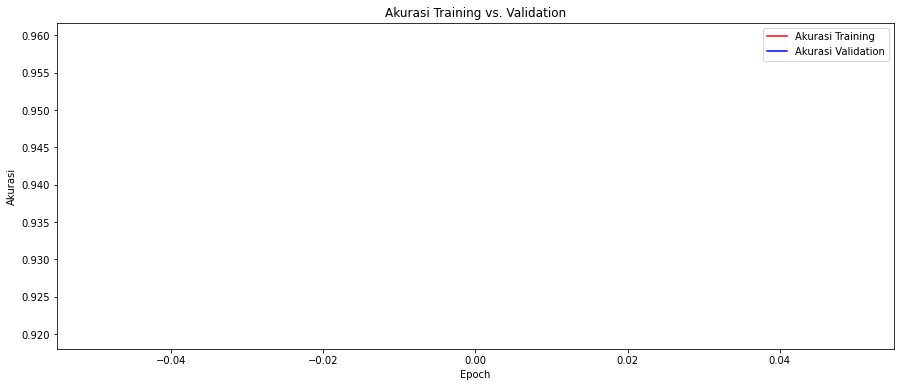

<Figure size 432x288 with 0 Axes>

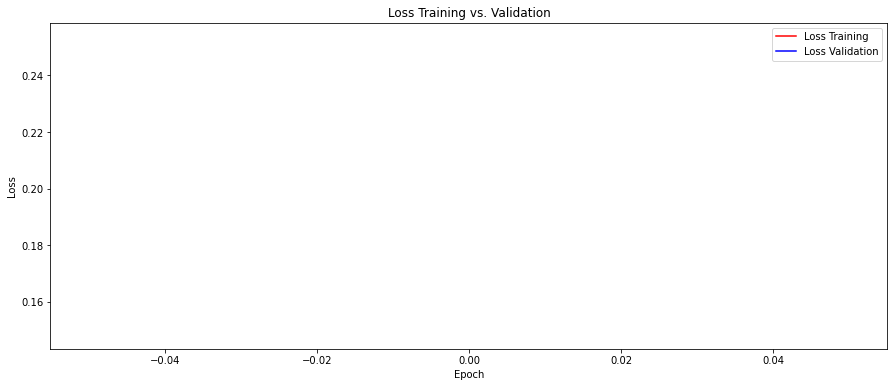

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plot akurasi di data training dan validation

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))

akurasi = performa_tl.history['accuracy']
val_akurasi = performa_tl.history['val_accuracy']
loss = performa_tl.history['loss']
val_loss = performa_tl.history['val_loss']

epochs = range(len(akurasi))

#Plot akurasi
plt.plot(epochs, akurasi, 'r', label='Akurasi Training')
plt.plot(epochs, val_akurasi, 'b', label='Akurasi Validation')
plt.title('Akurasi Training vs. Validation')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(loc=0)
plt.figure()
plt.show()

#Plot loss
plt.figure(figsize=(15, 6))
plt.plot(epochs, loss, 'r', label='Loss Training')
plt.plot(epochs, val_loss, 'b', label='Loss Validation')
plt.title('Loss Training vs. Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
#Prediksi gambar baru

import numpy as np
from google.colab import files
from tensorflow.keras.applications.xception import preprocess_input

labels = train_generator.class_indices.keys()

uploadnya = files.upload()

for fn in uploadnya.keys():
 
  #prediksi gambar
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = model_tl.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))
    print(proba)

In [ ]:
#Simpan model akhir
model_tl.save("model_Xception_PiknikRek.h5")
tf.keras.models.save_model(model_tl,'model_Xception_PiknikRek.hdf5')

In [ ]:
#Convert ke TF Lite
import tensorflow as tf

#Load model yang telah disimpah
model_akhir = tf.keras.models.load_model(filepath="model_Xception_PiknikRek.h5")

#Convert model tsb ke bentuk TF Lite
konversi = tf.lite.TFLiteConverter.from_keras_model(model_akhir)
model_tflite = konversi.convert()

#Simpan TF Lite model.
with tf.io.gfile.GFile('model_Xception_PiknikRek.tflite', 'wb') as f:
  f.write(model_tflite)

In [ ]:
#Simpan juga model akhir dalam bentuk json

model_tl_json = model_tl.to_json()
with open("model_tl_json", "w") as file_json:
    file_json.write(model_tl_json)

# Deployment with Gradio

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras

In [ ]:
def predict_image(img):
  img_4d=img.reshape(-1,224,224,3)
  prediksi=model_tl.predict(img_4d)[0]
  class_names = ['candi', 'kawah sikidang', 'telaga warna']
  return {class_names[i]: float(prediksi[i]) for i in range(3)}

In [ ]:
image = gr.inputs.Image(shape=(224,224), image_mode='RGB', invert_colors=False, source="upload")
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=predict_image, inputs=image, outputs=label, interpretation='default').launch(debug='True')